# Trend

A trend is a pattern that is observed over a period of time and represents
the mean rate of change with respect to time.

Detrending is the process of removing a trend from time-series data.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings #handles the warning messages

warnings.filterwarnings("ignore")


### Importing and visualizing data

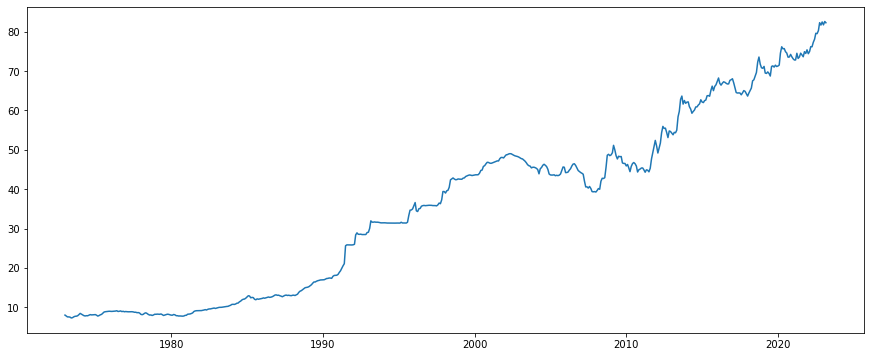

In [9]:

df = pd.read_excel('India_Exchange_Rate_Dataset.xls',index_col=0,parse_dates=True)

#
plt.figure(figsize=(15,6))
plt.plot(df.index, df.values) 

### Detrending Using Pandas Differencing

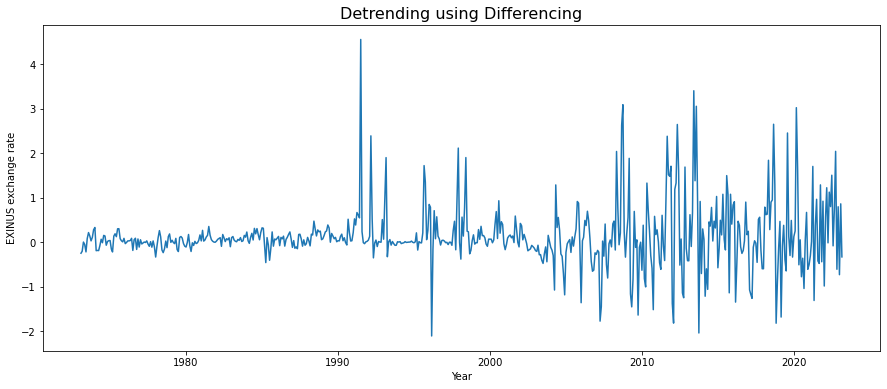

In [10]:
#diff function calculates the difference of a Series element 
#compared with another element in the Series (default is element in previous row).
diff = df.EXINUS.diff() 

plt.figure(figsize=(15,6))
plt.plot(diff)
plt.title('Detrending using Differencing', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

### Detrending Using a SciPy Signal

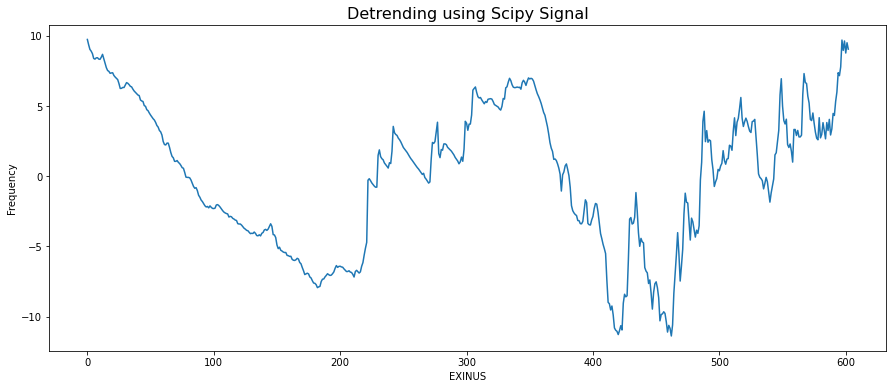

In [11]:
from scipy import signal 
#signal.detrend is a submodule of SciPy used to remove a linear trend along an axis from data
detrended = signal.detrend(df.EXINUS.values)
plt.figure(figsize=(15,6))
plt.plot(detrended)
plt.xlabel('EXINUS')
plt.ylabel('Frequency')
plt.title('Detrending using Scipy Signal', fontsize=16)
plt.show()

### Detrend Using an HP Filter

The Hodrick-Prescott (HP) filter is used for getting
rid of trend movements in data, contingent significantly on a tuning parameter that controls the degree of
smoothing. 


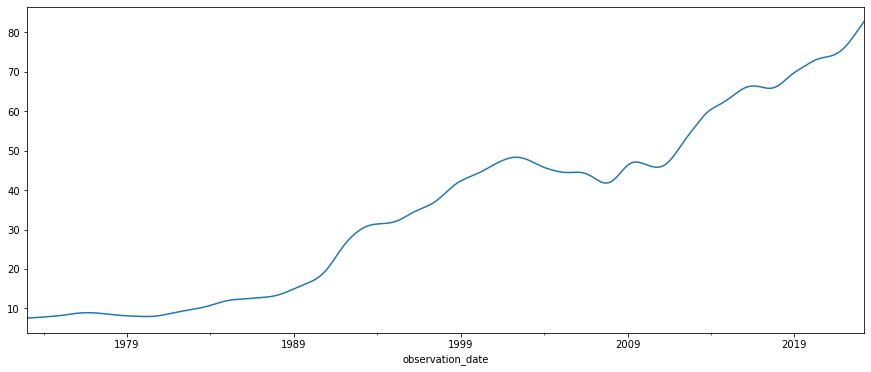

In [12]:
from statsmodels.tsa.filters.hp_filter import hpfilter
#Hpfilter is a submodule of Statmodels that is used to remove a smooth trend
EXINUS_cycle,EXINUS_trend = hpfilter(df['EXINUS'], lamb=1600)#smothing data
EXINUS_trend.plot(figsize=(15,6)).autoscale(axis='x',tight=True)

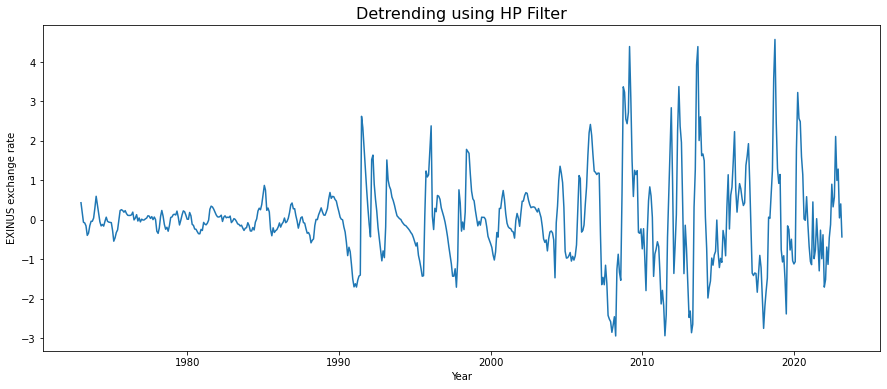

In [13]:
df['trend'] = EXINUS_trend
detrended = df.EXINUS - df['trend']
plt.figure(figsize=(15,6))
plt.plot(detrended)
plt.title('Detrending using HP Filter', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

# Seasonality
Seasonality is a periodical fluctuation where the same pattern occurs at a
regular interval of time. It is a characteristic of economics, weather, and
stock market time-series data; less often, it’s observed in scientific data.

#### detecting seasonality with the help of multiple box plots

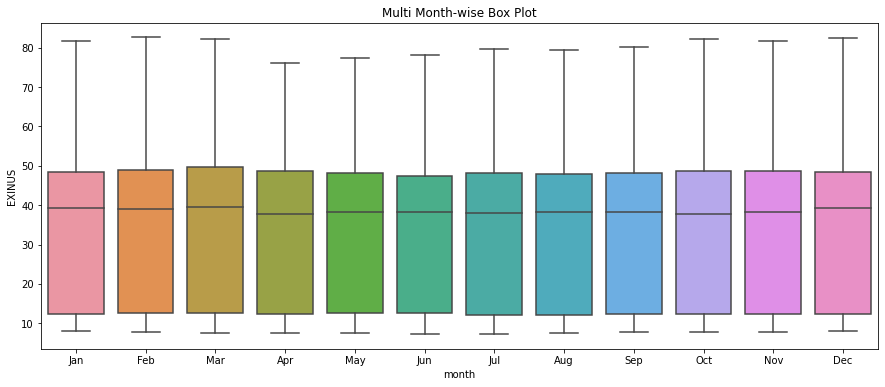

In [17]:
import seaborn as sns
df['observation_date'] = df.index
df['month'] = df['observation_date'].dt.strftime('%b')
df['year'] = [d.year for d in df.observation_date]
df['month'] = [d.strftime('%b') for d in df.observation_date]
years = df['year'].unique()
plt.figure(figsize=(15,6))
sns.boxplot(x='month', y='EXINUS', data=df).set_title("Multi Month-wise Box Plot")
plt.show()

### Autocorrelation Plot
Autocorrelation is used to check randomness in data. It helps to identify
types of data where the period is not known. For instance, for the monthly
data, if there is a regular seasonal effect, we would hope to see massive
peak lags after every 12 months. 

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

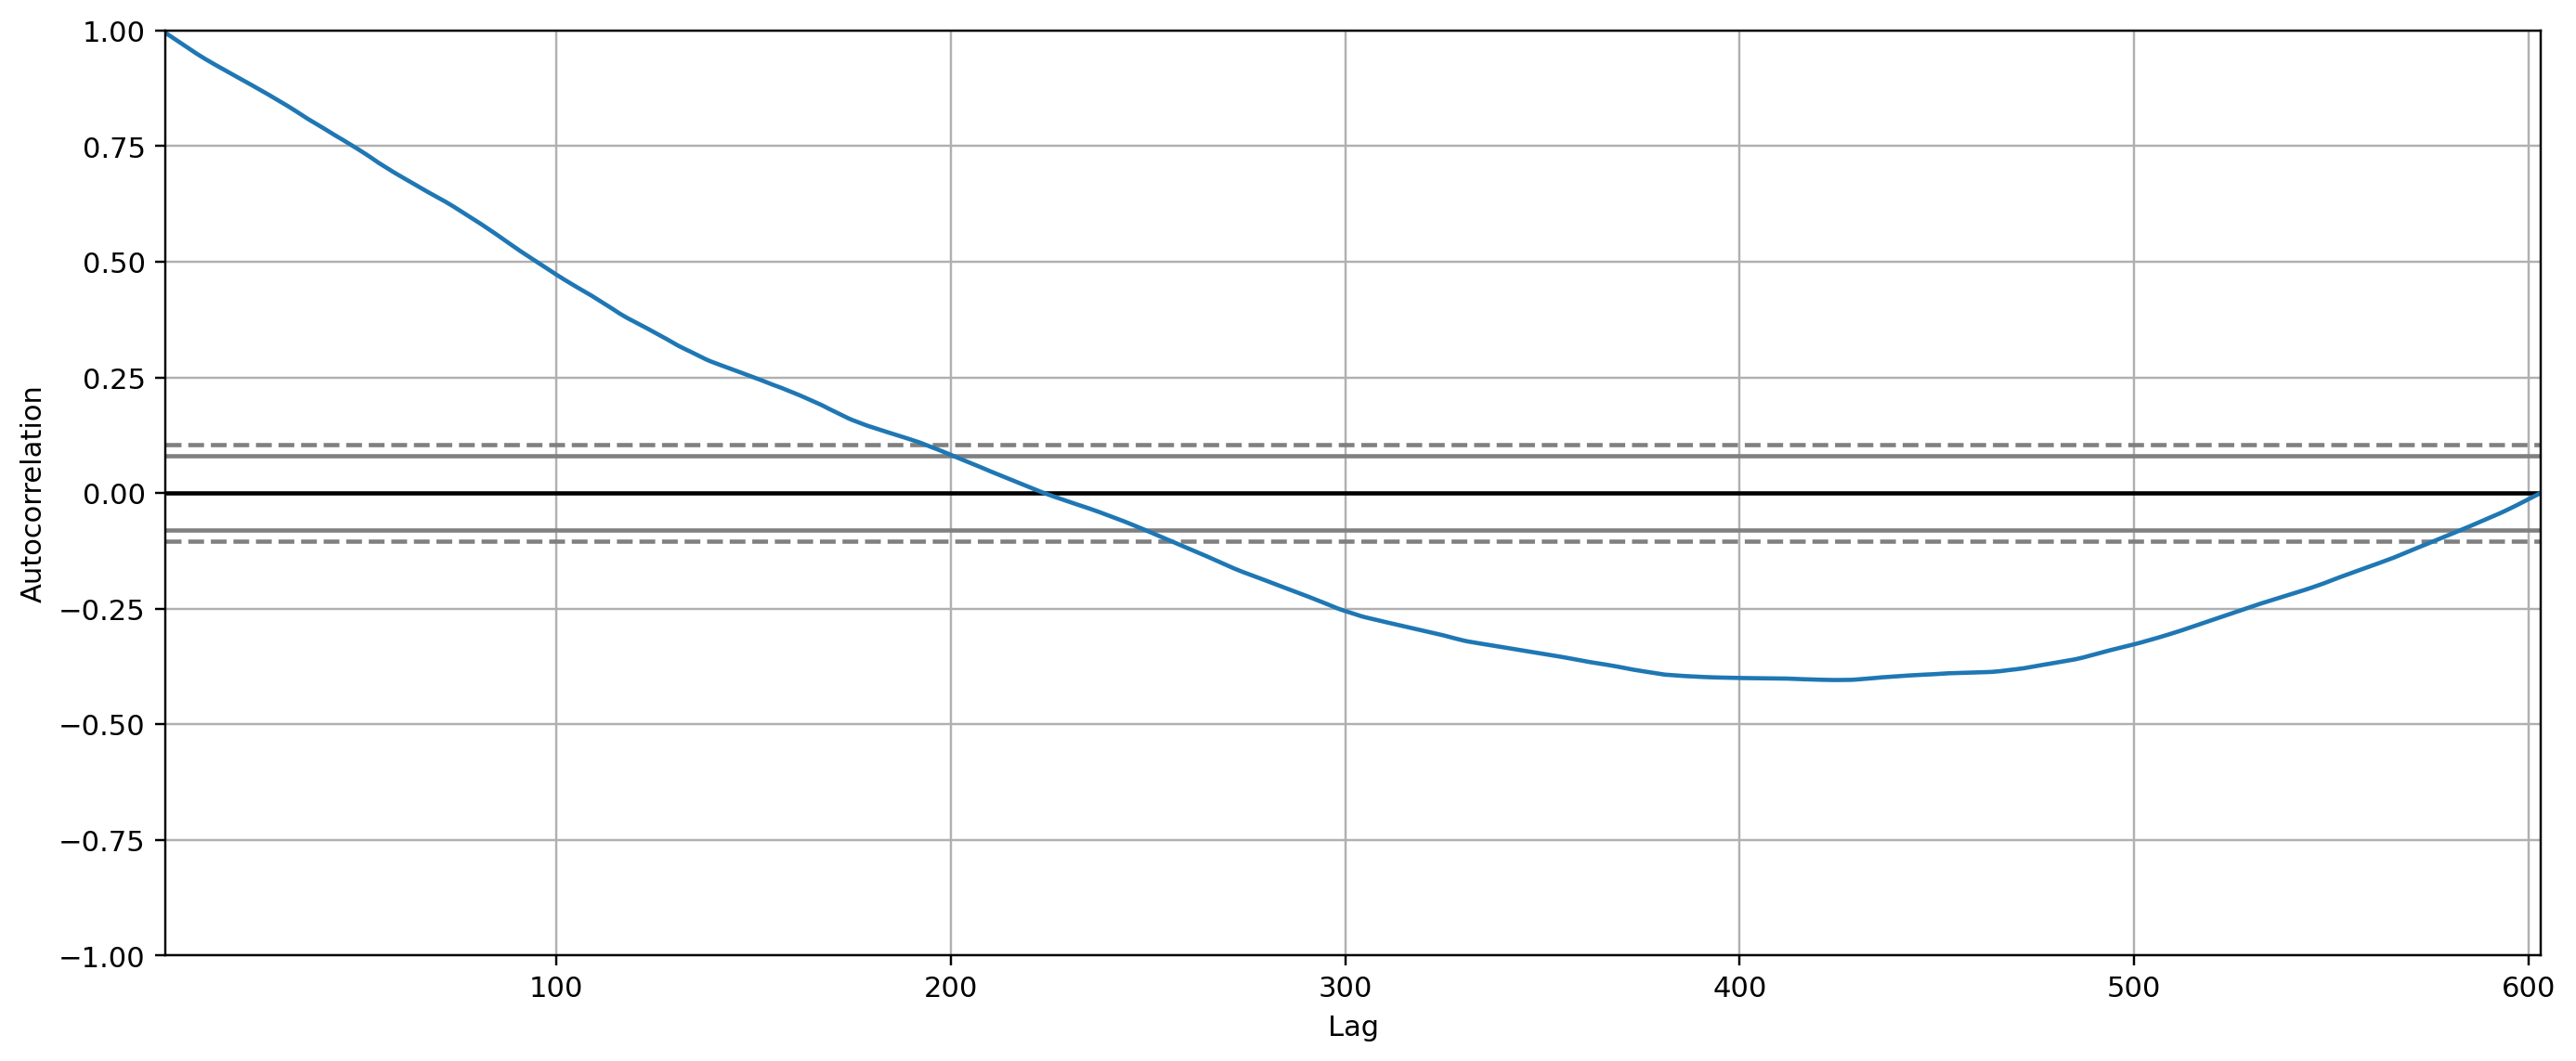

In [18]:
from pandas.plotting import autocorrelation_plot

plt.rcParams.update({'figure.figsize':(15,6), 'figure.dpi':220})
autocorrelation_plot(df.EXINUS.tolist())

### Seasonal Decomposition
Decomposition is the process of understanding generalizations and
problems related to time-series forecasting. We can leverage seasonal
decomposition to remove seasonality from data and check the data only
with the trend, cyclic, and irregular variations. 

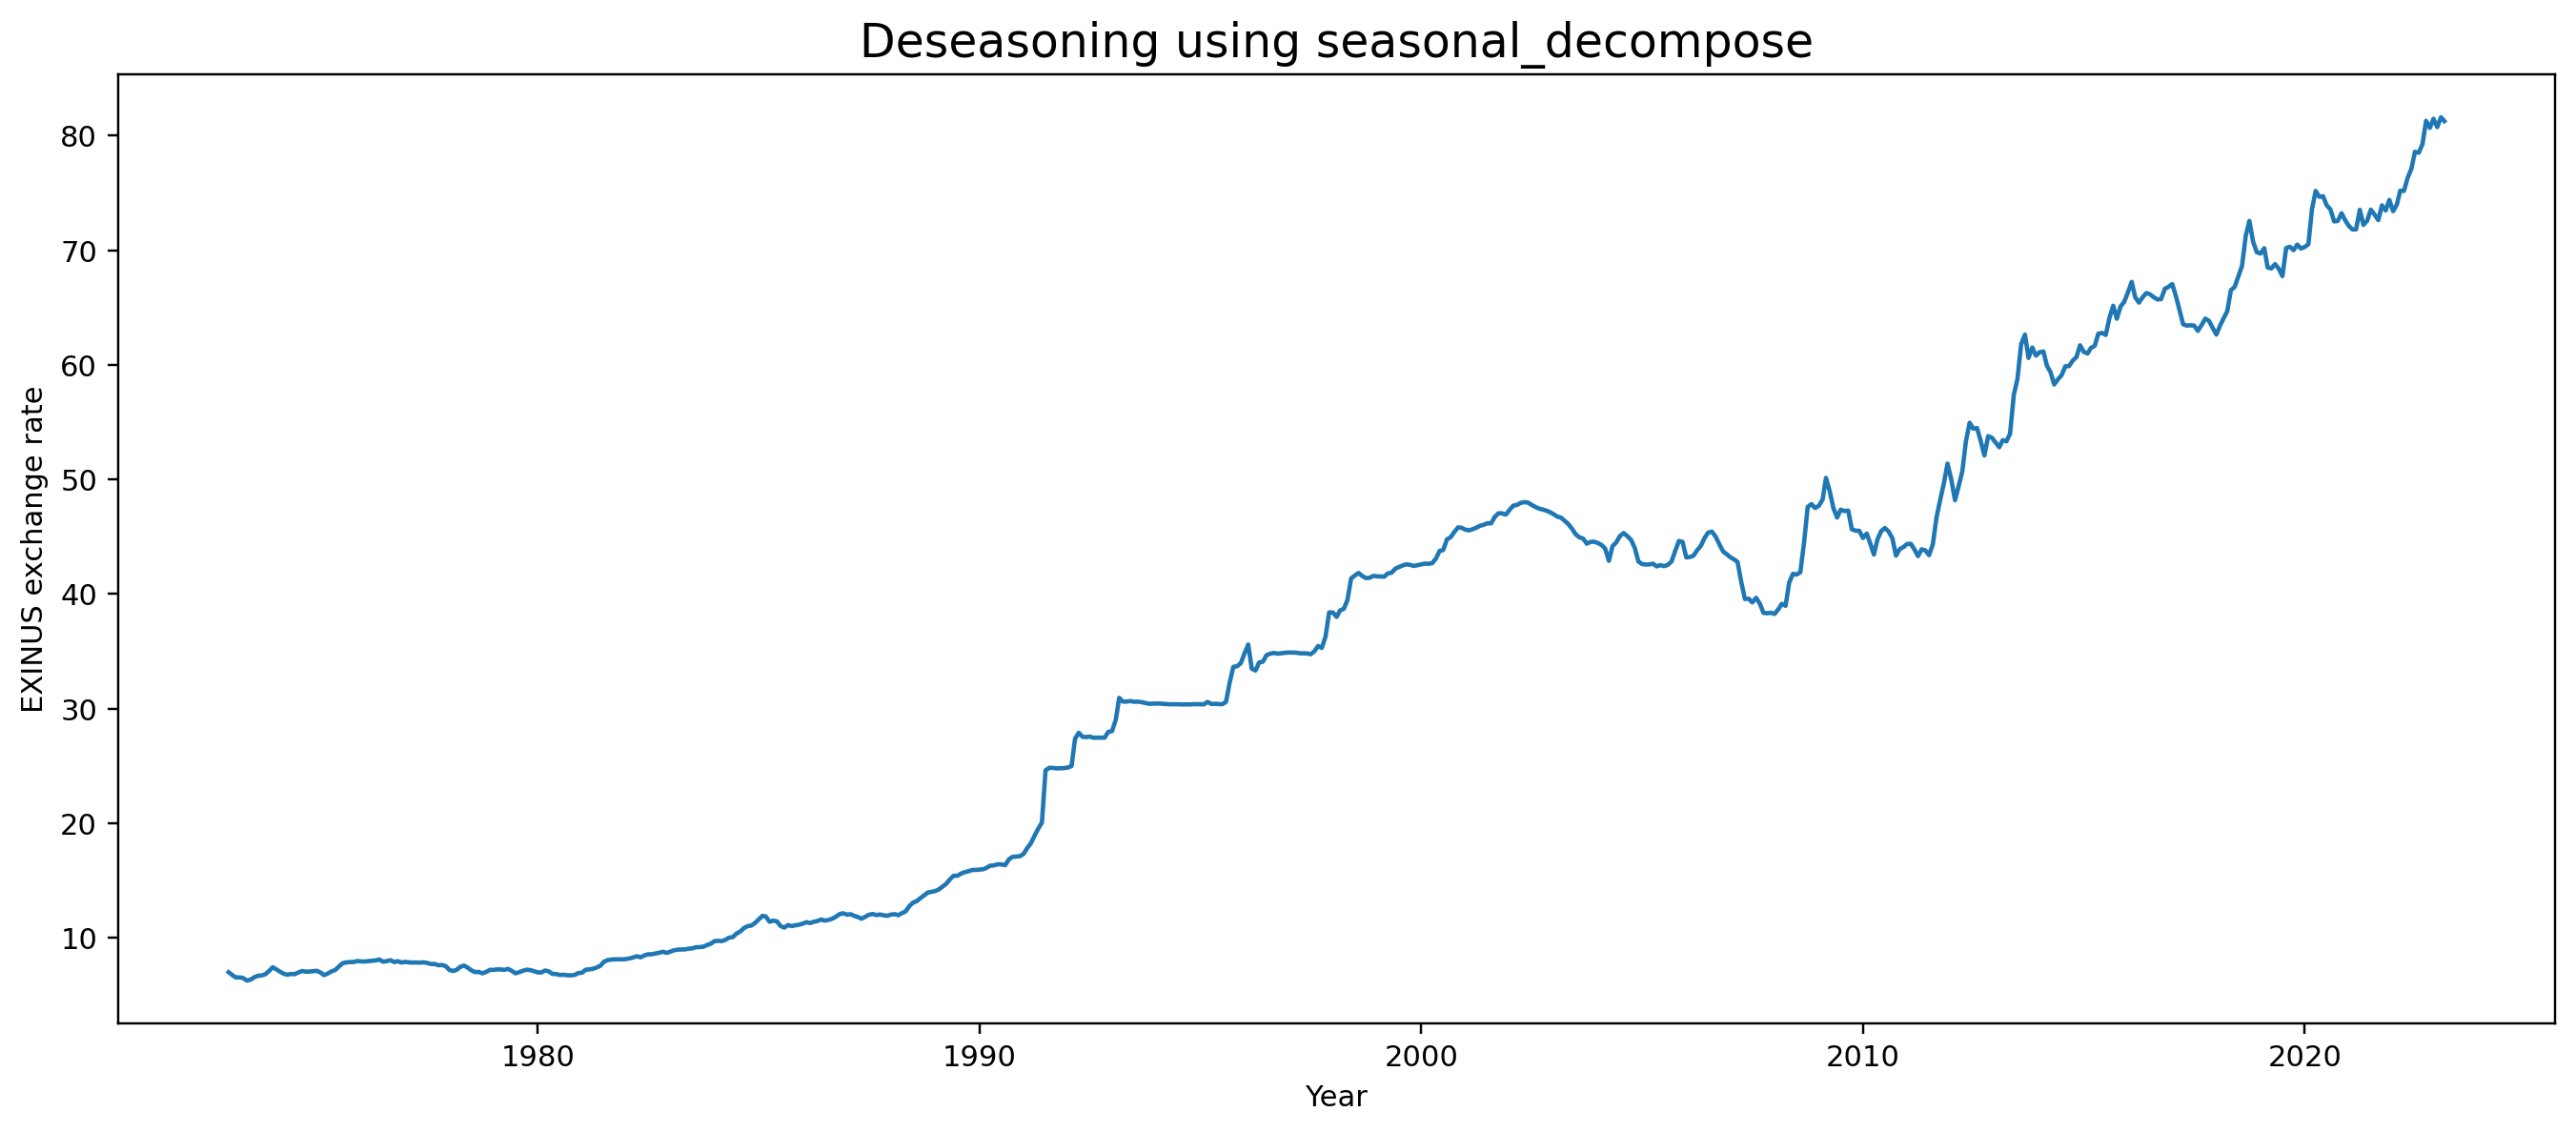

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_mul = seasonal_decompose(df['EXINUS'], model='multiplicative', extrapolate_trend='freq')
deseason = df['EXINUS'] - result_mul.seasonal

plt.figure(figsize=(15,6))
plt.plot(deseason)
plt.title('Deseasoning using seasonal_decompose', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

### Cyclic Variations
Cyclical components are fluctuations around a long trend observed every
few units of time; this behavior is less frequent compared to seasonality. It
is a recurrent process in a time series. 

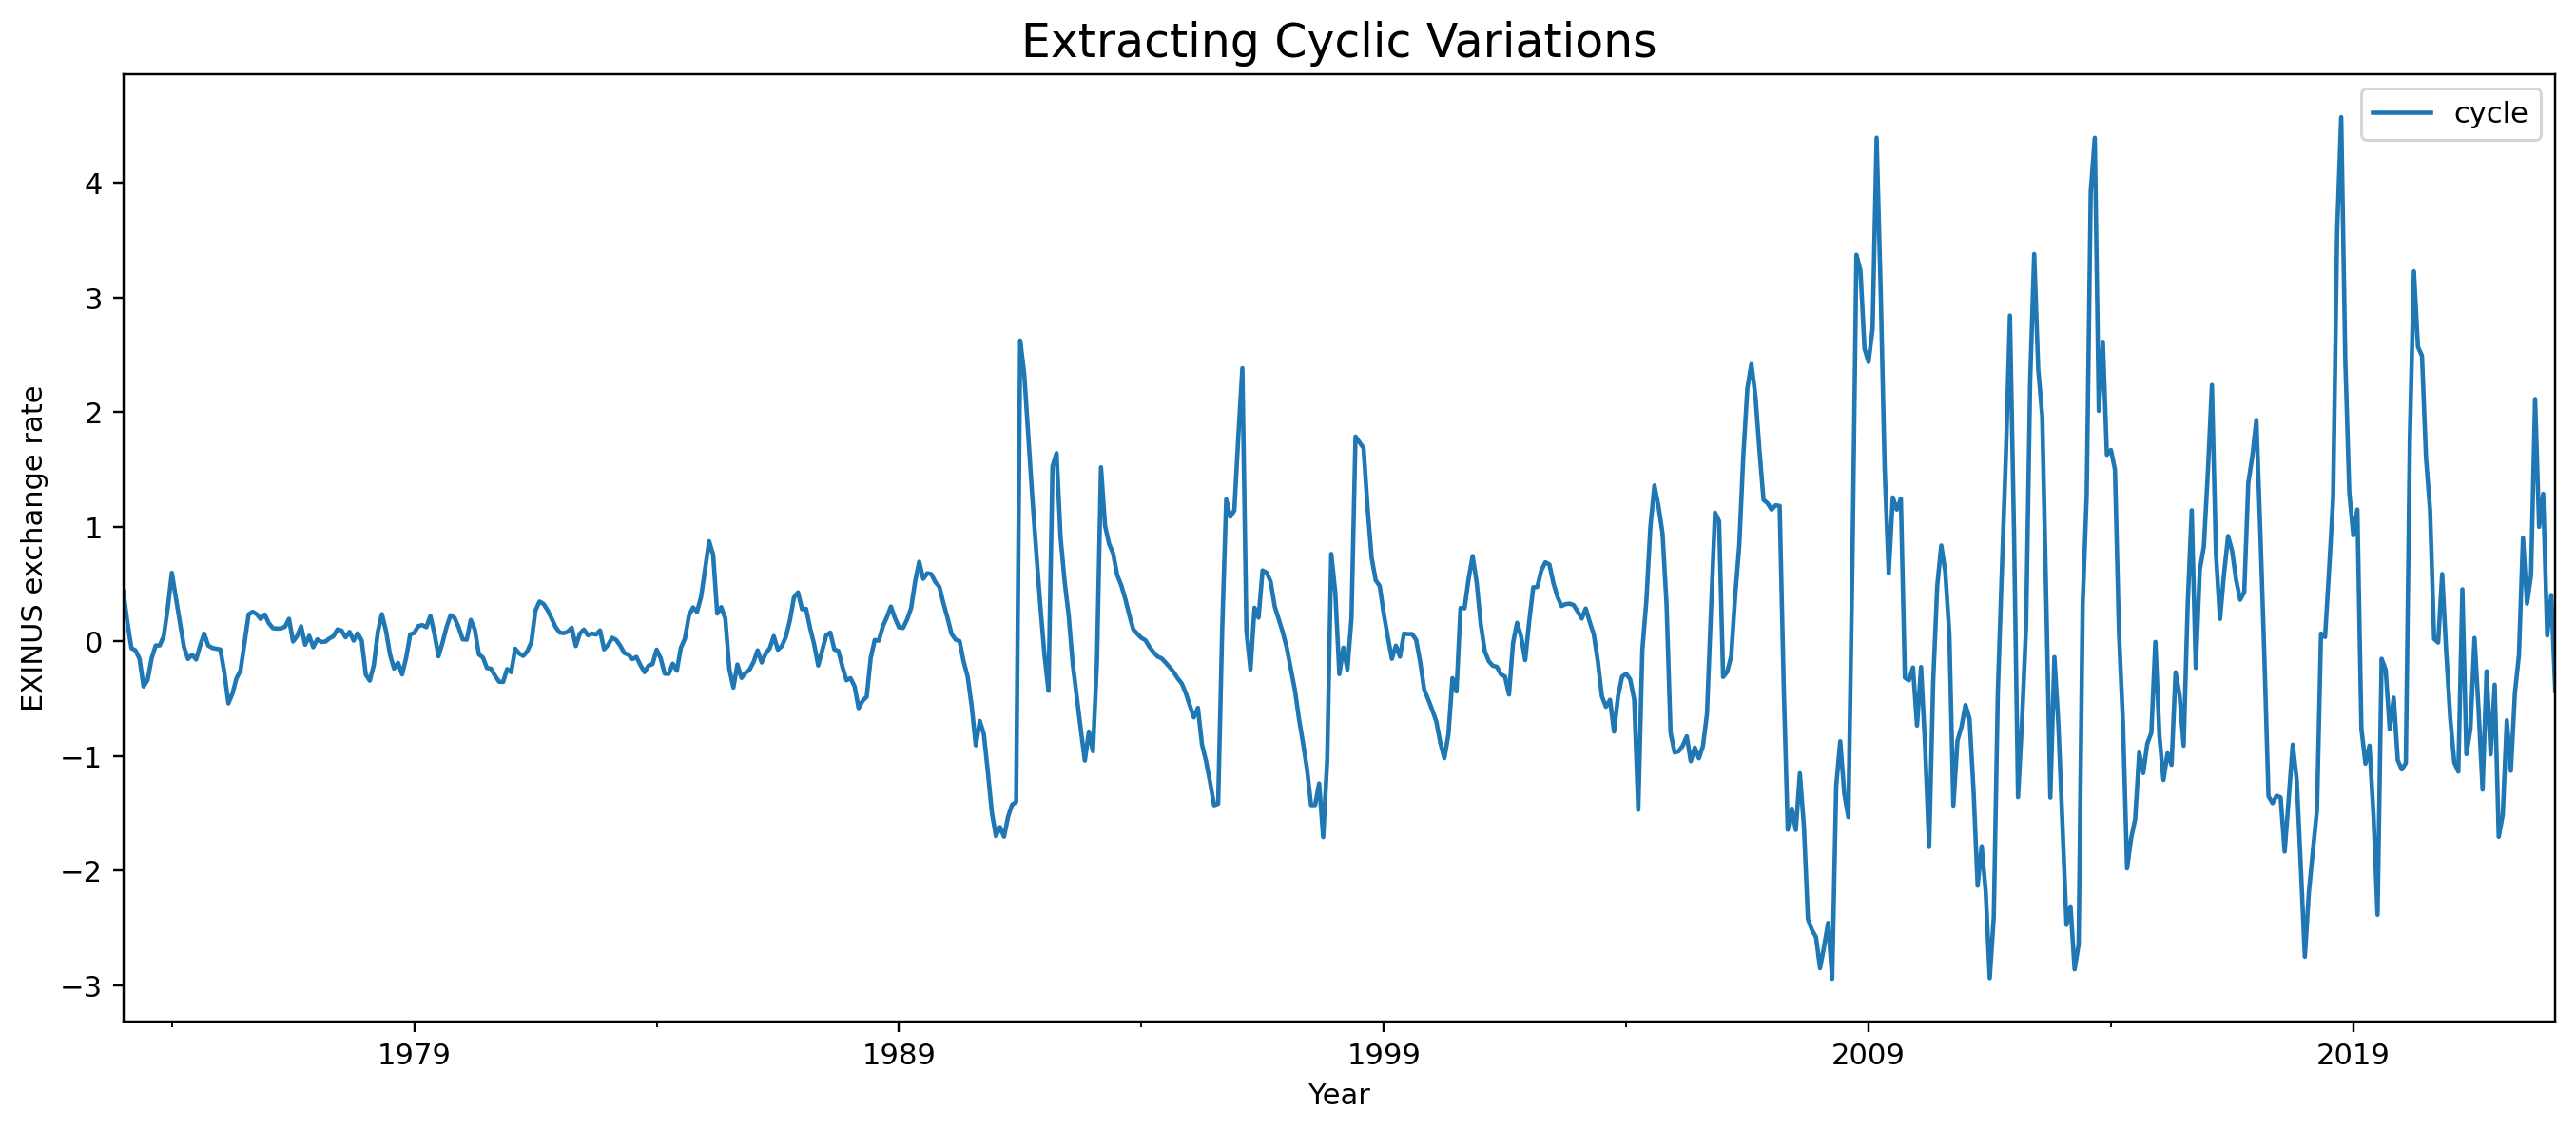

In [20]:
EXINUS_cycle,EXINUS_trend = hpfilter(df['EXINUS'], lamb=1600)
df['cycle'] =EXINUS_cycle
df['trend'] =EXINUS_trend
df[['cycle']].plot(figsize=(15,6)).autoscale(axis='x',tight=True)
plt.title('Extracting Cyclic Variations', fontsize=16)
plt.xlabel('Year')
plt.ylabel('EXINUS exchange rate')
plt.show()

When trend and cyclical variations are removed from time-series data, the
patterns left behind that cannot be explained are called errors, unexpected
variations, or residuals. Various methods are available to check for
irregular variations such as probability theory, moving averages, and
autoregressive time-series methods. If we can find any cyclic variation in
data, it is considered to be part of the residuals. These variations that occur
due to unexpected circumstances are called unexpected variations or
unpredictable errors.

### Decomposing a Time Series into Its Components
We can leverage seasonal decomposition from a stats model to decompose the data into its constituent parts, 
considering series as additive or multiplicative.

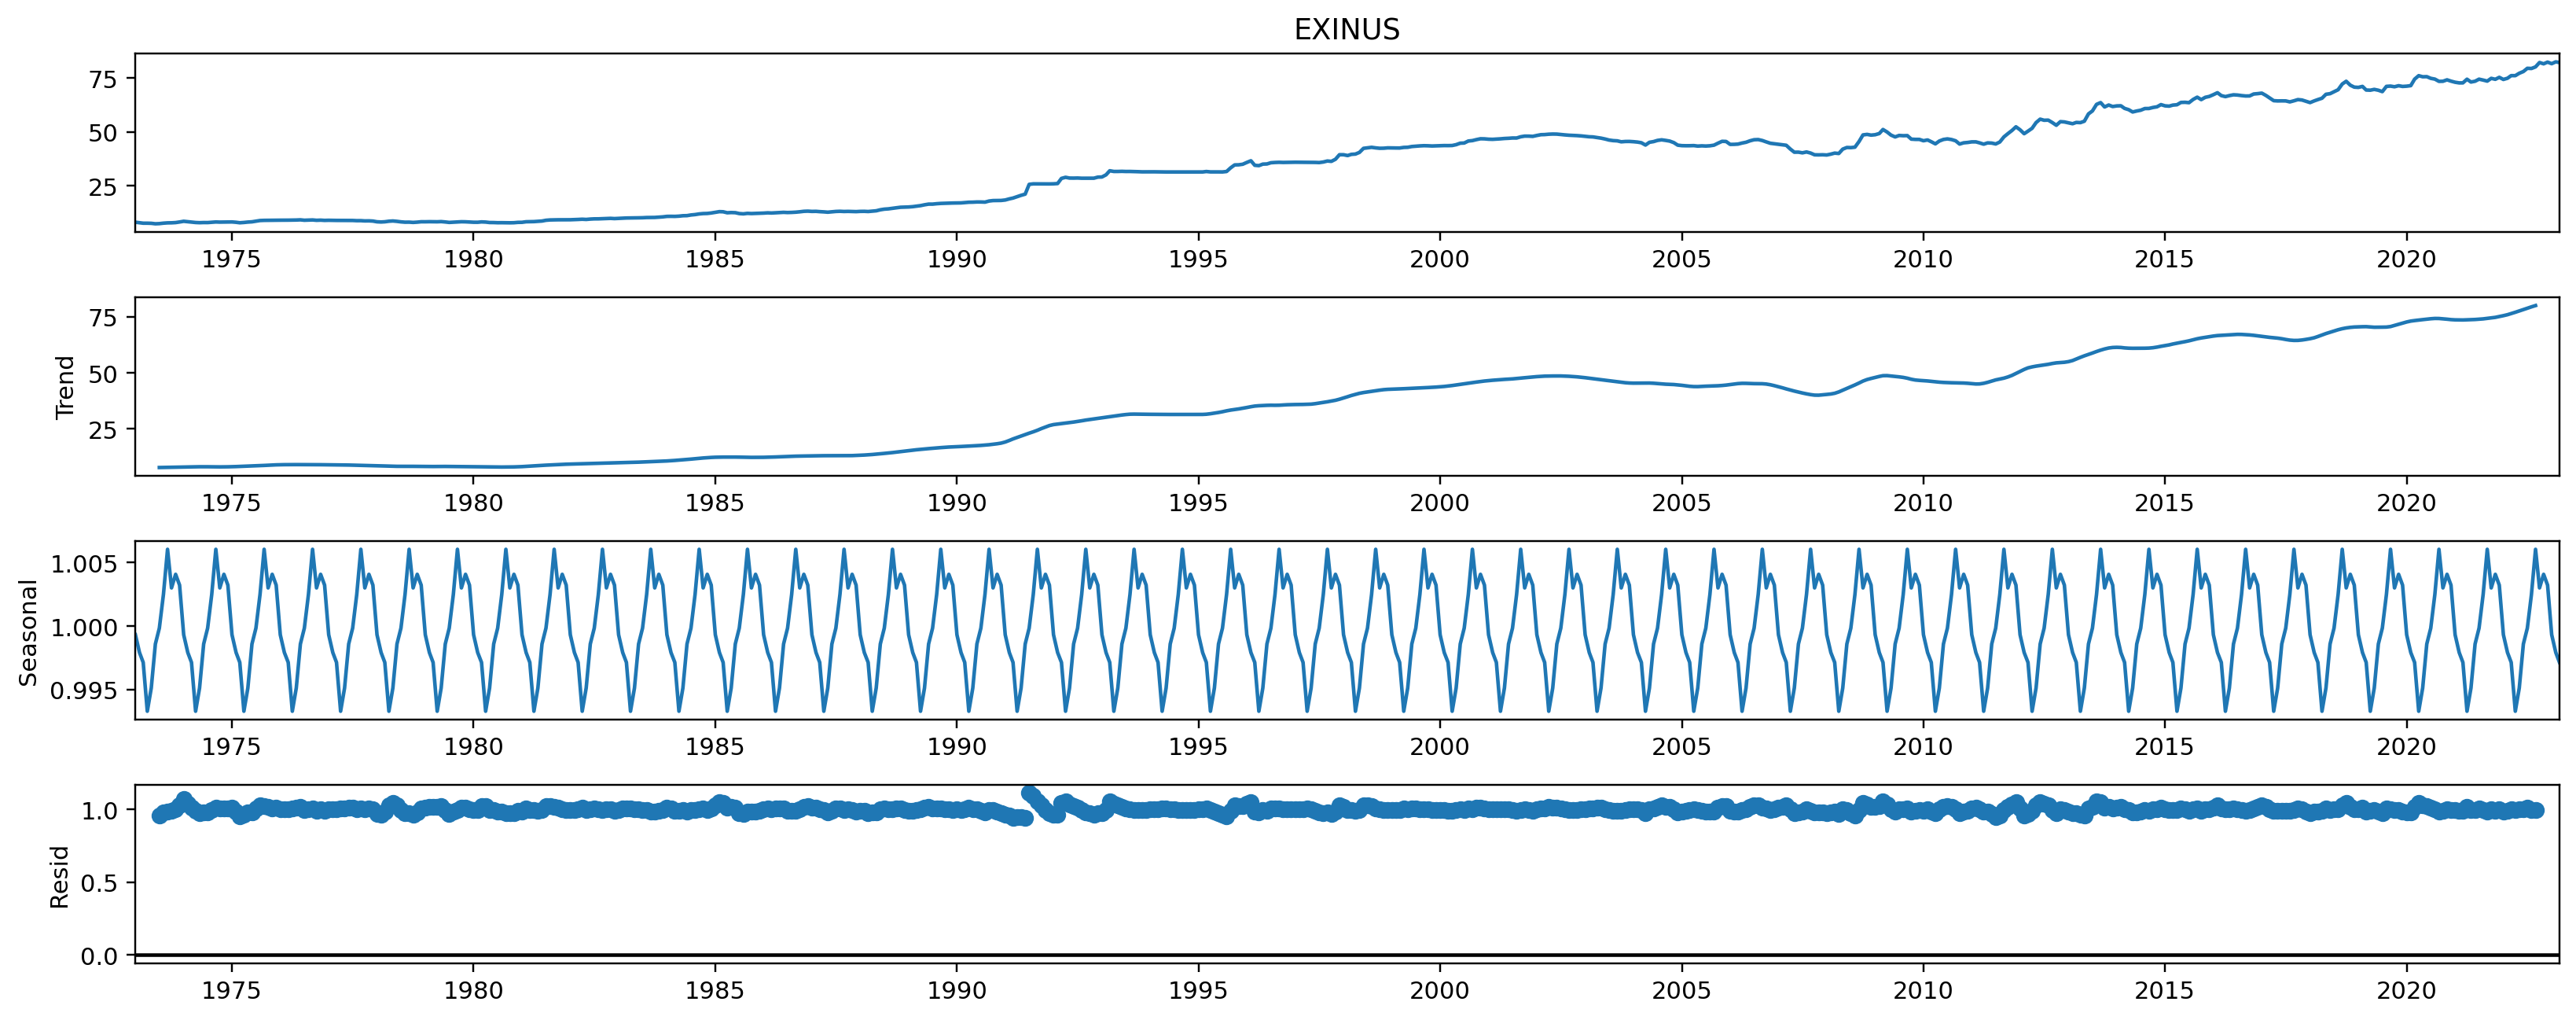

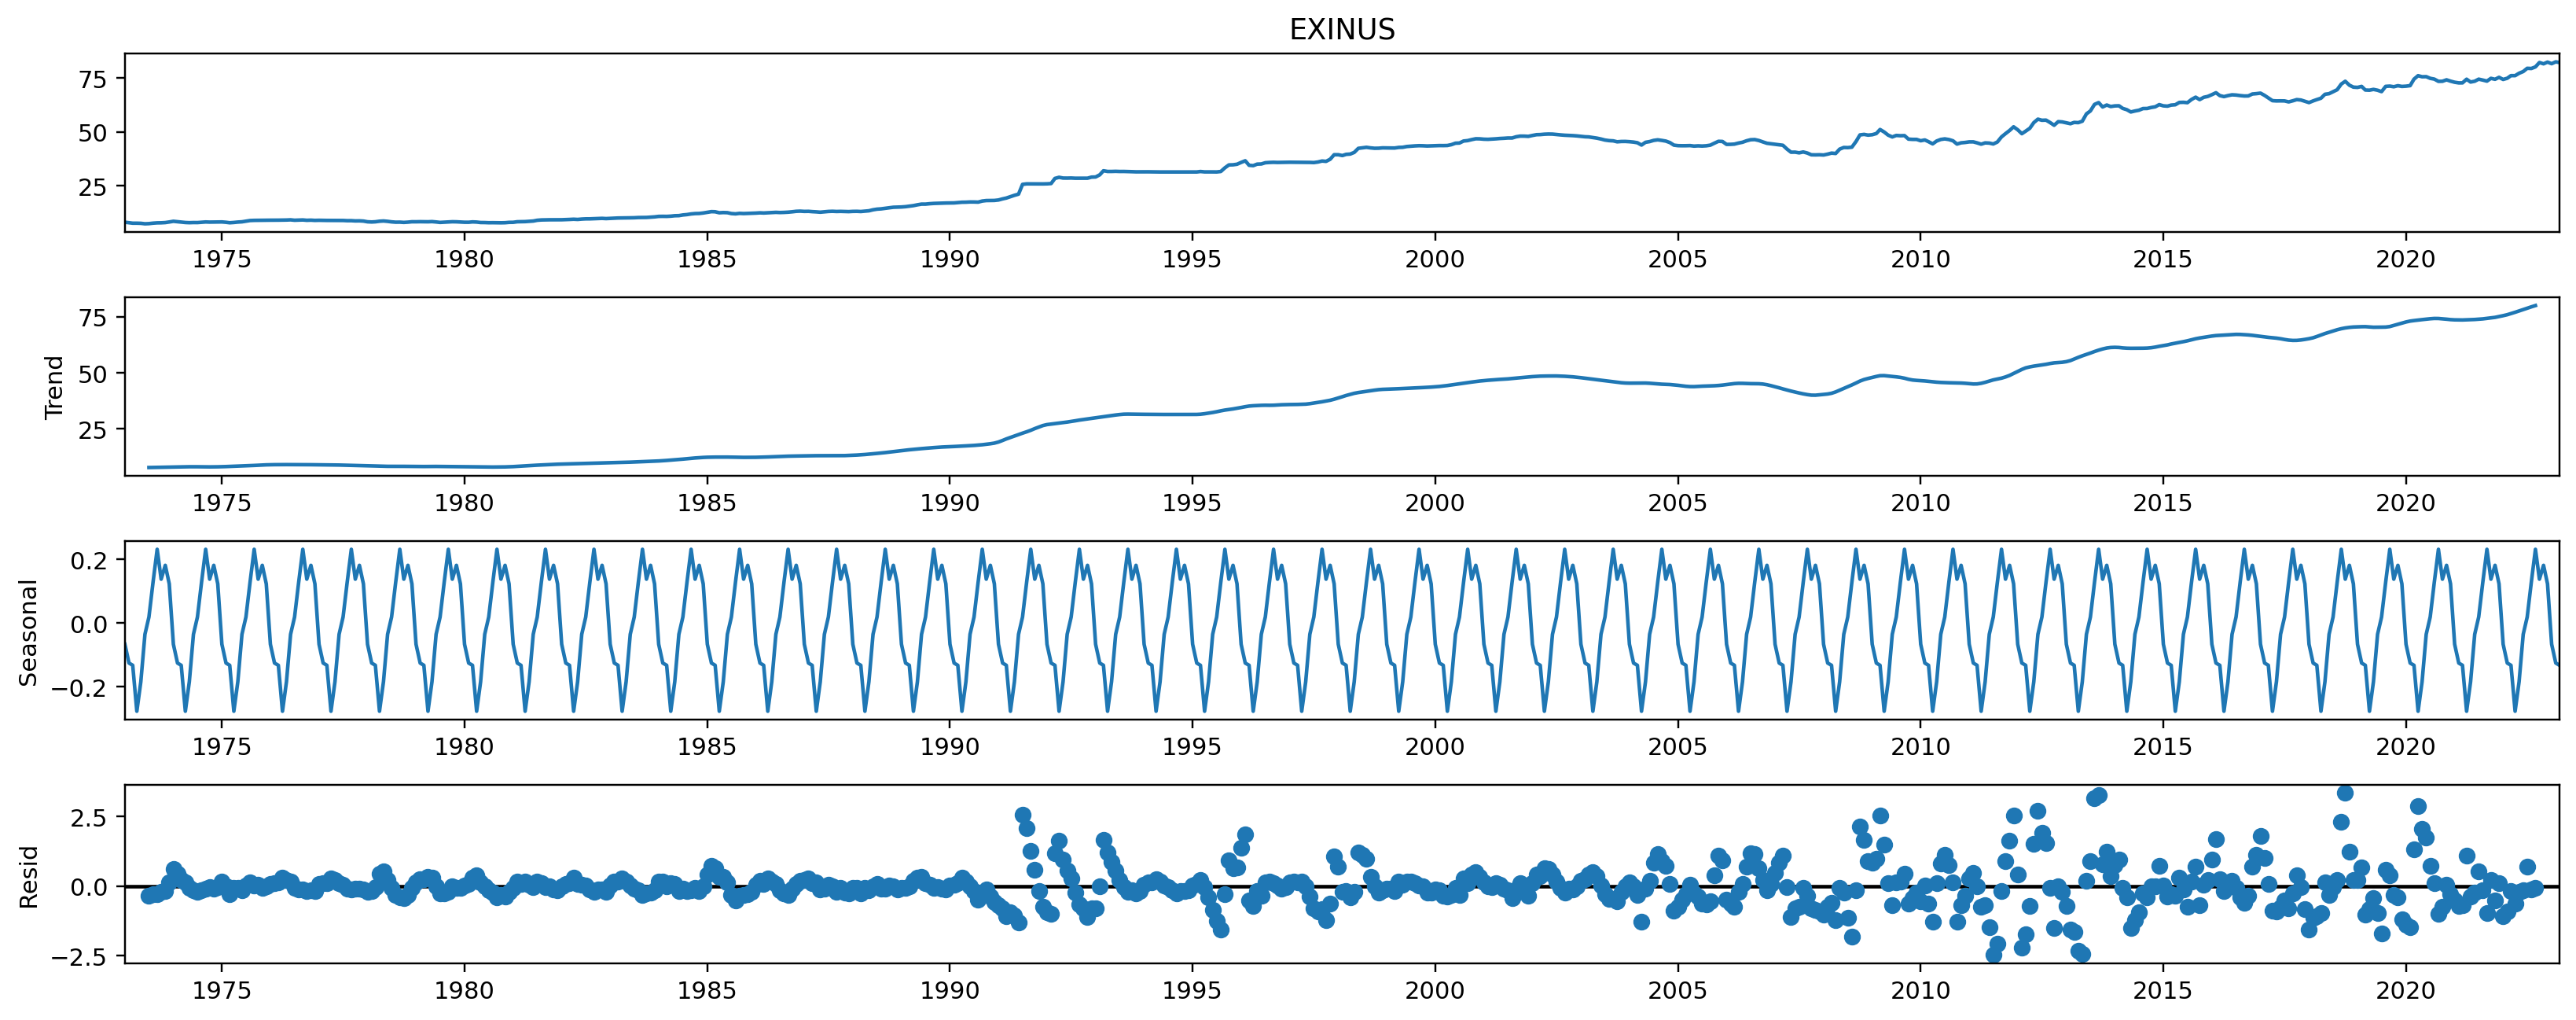

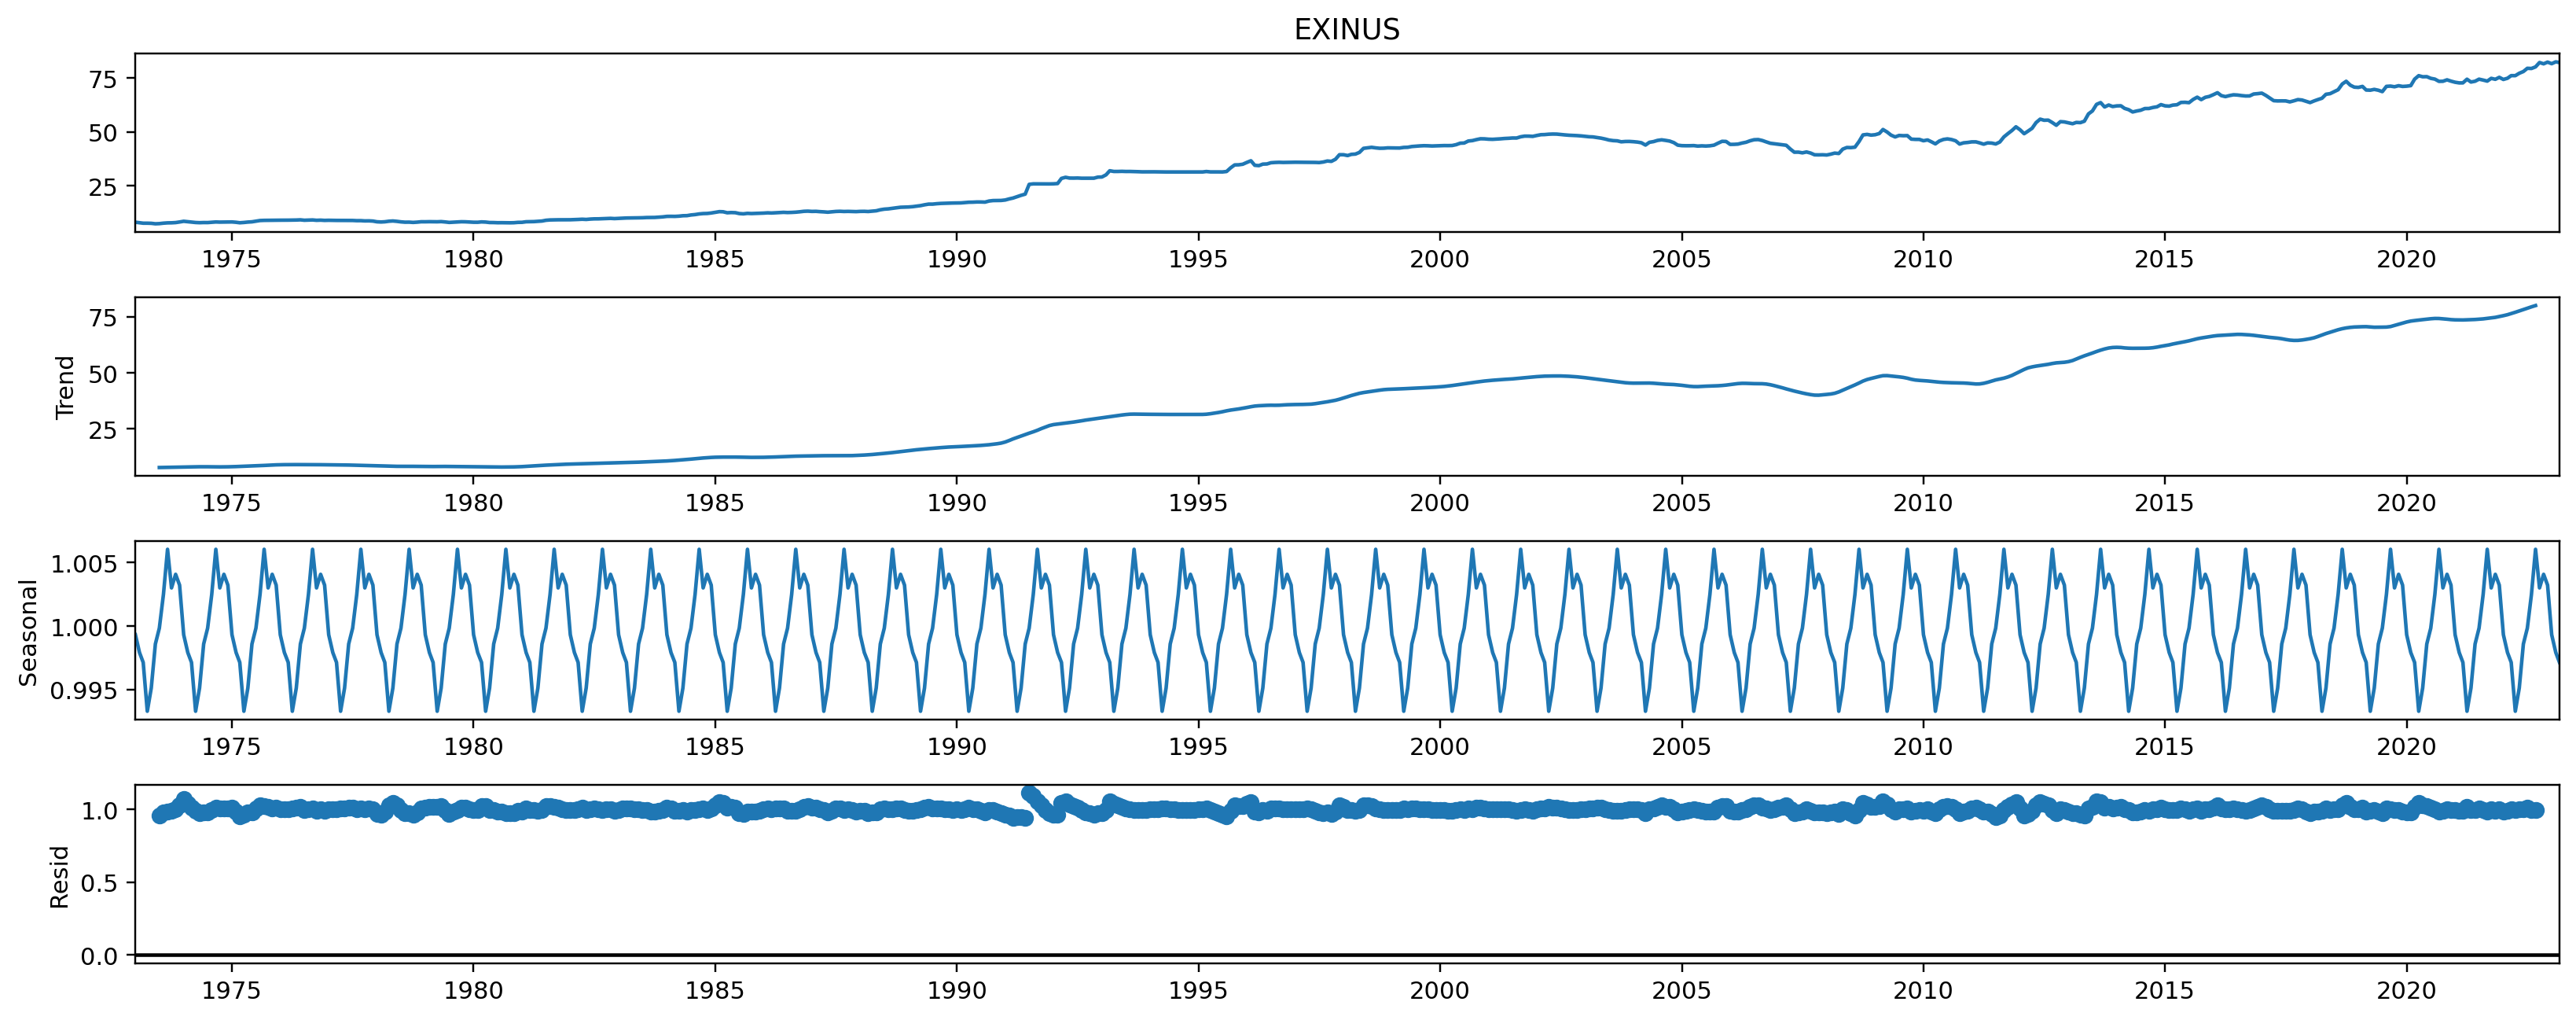

In [21]:
result = seasonal_decompose(df['EXINUS'], model='add')
result.plot()
result = seasonal_decompose(df['EXINUS'], model='mul')
result.plot()

In [ ]:
data1 = {
'Empid': [1011, 1012, 1013, 1014, 1015],
'Name': ['John', 'Rahul', 'Rick', 'Morty', 'Tim'],
    'Designation': ['Manager', 'Research Engineer', 'Research Engineer', 'VP', 'Delivery Manager'],
'Date_of_joining': ['01-Jan-2000', '23-sep-2006',
'11-Jan-2012','21-Jan-1991',
'12-Jan-1990']}

Emp_df = pd.DataFrame(data1, columns = ['Empid','Name', 'Designation','Date_of_joining'])

data2 = {
'Empid': [1011, 1017, 1013, 1019, 1015],
'Deptartment': ['Management', 'Research','Research', 'Management', 'Delivery'],
'Total_Experience': [18, 10, 10, 28, 22]}

Dept_df = pd.DataFrame(data2, columns = ['Empid','Deptartment', 'Total_Experience'])